# Taller

Responder las preguntas de analítica acerca de la base de datos de IMDB que se encuentran a lo largo de este documento. Modifique el nombre de este archivo por el número de su documento (123456789.ipynb) y adjúntelo como parte de los entregables del taller.

Nombre: 



### Descargar los datos:
- Tabla de películas
- Archivo .shp y archivos auxiliares con la información necesaria para pintar el mapa

Estos archivos quedarán en la carpeta _/content/IMDBAnalyticsData/_ asociada con el sistema operativo del servidor en el que se está ejecutando google colab. 

In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr' -O data
!unzip "/content/data" -d "/content/IMDBAnalyticsData/"


--2023-03-02 15:52:45--  https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr
Resolving docs.google.com (docs.google.com)... 142.250.141.138, 142.250.141.100, 142.250.141.102, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4m3mu3781d16uof181927ugobi913g3i/1677772350000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=e58bfb0a-0b97-4b0a-bc1c-4d123f0e94ca [following]
--2023-03-02 15:52:45--  https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4m3mu3781d16uof181927ugobi913g3i/1677772350000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=e58bfb0a-0b97-4b0a-bc1c-4d123f0e94ca
Resolving doc-14-6c-docs.googleusercontent.com (doc-14-6c-docs.googleusercontent.com)... 142.250.141.132, 2607:


### Importar las librerías necesarias

La libreia geopandas, que sirve para el procesamiento de archivos con información geográfica (shapefiles) no está instalada por defecto en el ambiente de google colab. Por esta razón, debe instalarla

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

### Información básica de la tabla de películas

In [4]:
df = pd.read_csv('IMDBAnalyticsData/Data/movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


**Pregunta 1**

Utilice histogramas para comparar la distribución de la columna _imdb_score_ relacionada con películas producidas en Francia y Canadá.

Para crear el histograma:

- Ajuste el número de _bins_ a 20
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

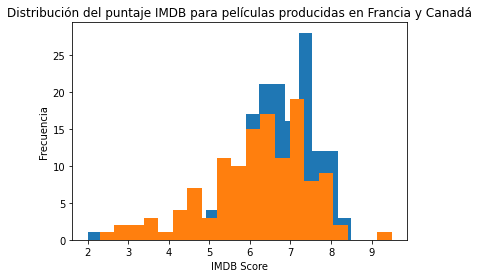

In [8]:

movies_fr = df[df.country == 'France']
movies_ca = df[df.country == 'Canada']


plt.hist(movies_fr.imdb_score, bins=20, label='Francia')
plt.hist(movies_ca.imdb_score, bins=20, label='Canadá')


plt.xlabel('IMDB Score')
plt.ylabel('Numero de peliculas en francia y canada')
plt.title('Distribución del puntaje IMDB para películas producidas en Francia y Canadá')

plt.grid(False)

plt.show()


**Pregunta 2**

Cree un histograma para mirar la distribución de la columna _imdb_score_ de las películas producidas en blanco y negro.

Para crear el histograma:

- Ajuste el número de _bins_ a 10
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

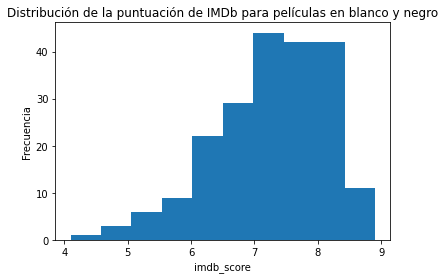

In [10]:
data_bw = df[df['color'] == ' Black and White']  
plt.hist(data_bw['imdb_score'], bins=10)
plt.xlabel('imdb_score')
plt.ylabel('Numero de peliculas')
plt.title('Distribución de la puntuación de IMDb para películas en blanco y negro')
plt.grid(False)
plt.show()            

**Pregunta 3**

¿Qué país tiene el mayor promedio de calificación de películas? Utilice figuras de barras para visualizar los resultados.  



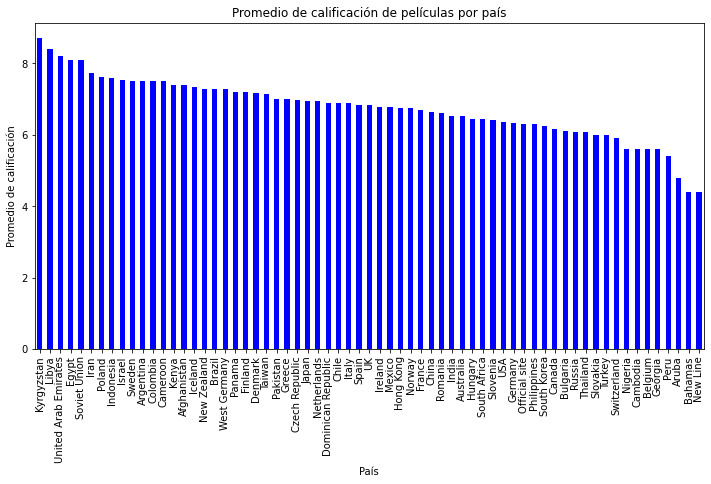

In [16]:
ratings_by_country = df.groupby("country").mean()["imdb_score"]

# ordenar los resultados de mayor a menor promedio de calificación
ratings_by_country = ratings_by_country.sort_values(ascending=False)

# crear una figura de barras
ratings_by_country.plot(kind="bar", figsize=(12,6), color="blue")

# agregar etiquetas y títulos
plt.xlabel("País")
plt.ylabel("Promedio de calificación")
plt.title("Promedio de calificación de películas por país")
plt.show()

**Pregunta 4** 

¿Cuántas películas a blanco y negro y cuántas películas a color se tienen en la base de datos?


In [18]:
dataBW = df['color'].value_counts()[' Black and White']
dataCo = df['color'].value_counts()['Color']

print("Cantidad de películas a blanco y negro:", dataBW)
print("Cantidad de películas a color:", dataCo)


Cantidad de películas a blanco y negro: 209
Cantidad de películas a color: 4815


**Pregunta 5**

¿Cuál película de Christopher Nolan tiene la mayor calificación (_imdb_score_)? Utilice figuras de barras para visualizar los resultados.

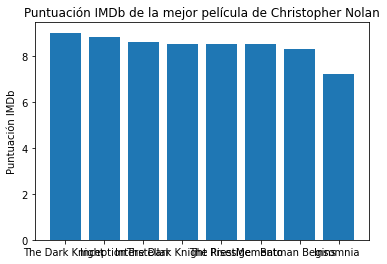

La película de Christopher Nolan con la mayor calificación es: The Dark Knight  con una puntuación de 9.0


In [25]:
NolanMovies= df[df['director_name'] == 'Christopher Nolan']  
sort = NolanMovies.sort_values('imdb_score', ascending=False)

# Mostrar la película con la mayor calificación
topMovie = sort.iloc[0]

plt.bar(sort['movie_title'], sort['imdb_score'])
plt.ylabel('Puntuación IMDb')
plt.title('Puntuación IMDb de la mejor película de Christopher Nolan')
plt.show()

print("La película de Christopher Nolan con la mayor calificación es:", topMovie['movie_title'], "con una puntuación de", topMovie['imdb_score'])

**Pregunta 6**

Utilice un _line chart_ para visualizar cuántas películas se produjeron en USA desde el 2010 hasta el 2015.

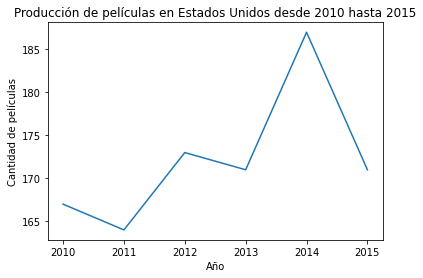

In [26]:
usMovies = df[(df['country'] == 'USA') & (df['title_year'] >= 2010) & (df['title_year'] <= 2015)]

# Contar la cantidad de películas producidas por año
count = usMovies['title_year'].value_counts().sort_index()

# Crear un gráfico de línea para visualizar los resultados
plt.plot(count.index, count.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.title('Producción de películas en Estados Unidos desde 2010 hasta 2015')
plt.show()


**Pregunta 7**

Grafique en un mapa el _imdb_score_ promedio de las películas producidas en cada país.

In [27]:
countryScores = df.groupby('country')['imdb_score'].mean().reset_index()

# Crear un mapa con el imdb_score promedio por país
fig = px.choropleth(countryScores, locations='country', locationmode='country names', 
                    color='imdb_score', range_color=[0, 10], 
                    title='IMDb Score promedio de las películas producidas en cada país')
fig.show()

**Pregunta 8**

¿Qué información de su proyecto podría utilizar para hacer analítica de datos?


In [ ]:
Esta analitica de datos respecto a la pagina web que estamos desarrollando junto a mi equipo podria ayudarnos a visualizar cuales comidas son las mejores 
para poder recomendarle a los usuarios buenos alimentos y dietas para poder desarrollar un mejor estado fisico y mental.